In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st 
import matplotlib.pyplot as plt

In [31]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Model Selection   🌼

In [32]:
model_star_score_energy = pd.read_csv('/content/gdrive/My Drive/projet_prediction/starscore_selection_model_site_energy_use.csv')

In [33]:
model_star_score_ghge = pd.read_csv('/content/gdrive/My Drive/projet_prediction/star_score_selection_model_GHGE.csv')

In [34]:
model_energy = pd.read_csv('/content/gdrive/My Drive/projet_prediction/selection_model_site_energy_use.csv')

In [35]:
model_ghge = pd.read_csv('/content/gdrive/My Drive/projet_prediction/selection_model_GHGE.csv')

##Model predicting energy

###With star score

In [36]:
display(model_star_score_energy)

,Unnamed: 0,model_s,root_mean_squared_error,mean percentage
0,0,ridge,20198.648762,1.327865
1,1,lasso,20582.879633,1.353125
2,2,elasticnet,20564.647754,1.351926
3,3,randomforest,92074.729979,6.053020
4,4,Xgboost,80786.192646,5.310909


###Without starscore

In [37]:
display(model_energy)

,Unnamed: 0,model_s,root_mean_squared_error,mean percentage
0,0,ridge,20166.540045,1.325754
1,1,lasso,20637.523726,1.356717
2,2,elasticnet,20585.853488,1.353320
3,3,randomforest,92834.700393,6.102981
4,4,Xgboost,80072.538797,5.263993


##Model predicting GHGE emssions 

###without star score

In [38]:
display(model_ghge)

,Unnamed: 0,model_s,root_mean_squared_error,error from mean
0,0,ridge,0.164734,22.693716
1,1,lasso,0.241277,33.238276
2,2,elasticnet,0.165369,22.781220
3,3,randomforest,0.164803,22.703190
4,4,Xgboost,0.163367,22.505349


###With star score

In [39]:
display(model_star_score_ghge)

,Unnamed: 0,model_s,root_mean_squared_error,error from mean
0,0,ridge,0.165123,22.747312
1,1,lasso,0.241277,33.238276
2,2,elasticnet,0.165202,22.758161
3,3,randomforest,0.165324,22.774954
4,4,Xgboost,0.162942,22.446807




*   The best model for predicting the energy use is without the star score. The best algorith for energy prediction is the ridge regression
*   The best model for predicting emissions is without the energy star score and the best algorithm is the xgboost

Overall, the better model is the one that calculates energy site use, it's error is only 3 % of the mean where as for the ghge emissions it's around 18 % of the mean of Y



#Model finetuning

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st 
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import Ridge

In [41]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
df = pd.read_csv('/content/gdrive/My Drive/openclassrooms/df_regression.csv')

In [43]:
display(df['Unnamed: 0'])
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

0        0
1        1
2        2
3        3
4        4
      ... 
422    422
423    423
424    424
425    425
426    426
Name: Unnamed: 0, Length: 427, dtype: int64

In [44]:
df.drop(['ENERGYSTARScore'], axis = 1, inplace = True )

In [45]:
df_regression = df.copy()

In [46]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
df_regression =  pd.DataFrame(Scaler.fit_transform(df_regression), columns= df_regression.columns)




##Energy prediction

###Trying Ridge

In [47]:
X = df_regression.drop(['TotalGHGEmissions'], axis = 1, inplace = False)
X = X.drop(['GHGEmissionsIntensity'], axis = 1)
X = X.drop(['ZipCode', 'CouncilDistrictCode', 'SiteEnergyUse(kBtu)' ], axis = 1)
Y = df_regression['SiteEnergyUse(kBtu)']

In [48]:
print(X.columns)

Index(['DataYear', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       ...
       'SecondLargestPropertyUseType_Non-Refrigerated Warehouse',
       'SecondLargestPropertyUseType_Office',
       'SecondLargestPropertyUseType_Other',
       'SecondLargestPropertyUseType_Other - Education',
       'SecondLargestPropertyUseType_Other - Restaurant/Bar',
       'SecondLargestPropertyUseType_Parking',
       'SecondLargestPropertyUseType_Restaurant',
       'SecondLargestPropertyUseType_Retail Store',
       'SecondLargestPropertyUseType_Self-Storage Facility',
       'SecondLargestPropertyUseType_Supermarket/Grocery Store'],
      dtype='object', length=104)


In [49]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y,test_size= 0.3)
display(X_test) 

,DataYear,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),...,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType_Other - Restaurant/Bar,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Supermarket/Grocery Store
360,0.0,0.068143,0.515594,-1.043110,0.113645,0.395014,-0.690014,-0.653012,-1.313774,0.415987,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,-1.796586,-0.119381,4.633971,-0.04845,-0.068599
412,0.0,0.080763,1.435792,1.572247,0.113645,2.451975,2.622066,2.994305,0.437716,-1.200472,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,0.556611,-0.119381,-0.215798,-0.04845,-0.068599
147,0.0,-1.179631,0.361902,0.870566,0.113645,-0.290640,-0.098797,-0.001955,-0.298319,-0.156935,...,5.240865,-0.303433,-0.154857,-0.04845,-0.04845,-1.796586,-0.119381,-0.215798,-0.04845,-0.068599
402,0.0,-0.952872,0.447865,0.615409,0.113645,-0.976294,0.060602,0.173578,0.303812,-1.553433,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,0.556611,-0.119381,-0.215798,-0.04845,-0.068599
23,0.0,-0.042031,-0.476891,-1.553424,0.113645,1.080668,1.019564,1.229602,1.061818,1.132140,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,0.556611,-0.119381,-0.215798,-0.04845,-0.068599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.0,-1.248140,0.365810,0.392147,0.113645,-0.290640,-0.861257,-0.841588,-0.723583,0.282987,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,0.556611,-0.119381,-0.215798,-0.04845,-0.068599
381,0.0,0.846174,0.360600,-0.532797,0.113645,-0.976294,-0.098844,-0.002007,-0.220790,-1.067473,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,-1.796586,-0.119381,4.633971,-0.04845,-0.068599
121,0.0,0.965162,1.035932,-0.787953,0.113645,0.395014,-1.024366,-1.021207,-0.910536,-0.259243,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,0.556611,-0.119381,-0.215798,-0.04845,-0.068599
425,0.0,0.795494,1.573203,1.795509,0.113645,-1.661948,2.613076,2.984405,3.258636,0.011872,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,0.556611,-0.119381,-0.215798,-0.04845,-0.068599


In [50]:
print(X_train.shape, y_train.shape)

(298, 104) (298,)


In [51]:
ridge_mse_score = []
ridge_mae_score = []
ridge_adj_r2 = []
from sklearn.model_selection import cross_validate
for i in np.arange(1, 10000, 100):
  print(i)
  model = Ridge(alpha=i )
  cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'))
  ridge_mse_score.append(np.mean(cv_results['test_neg_mean_squared_error']))
  ridge_mae_score.append(np.mean(cv_results['test_neg_mean_absolute_error']))
  print(cv_results['test_r2'])
  ridge_adj_r2.append(np.mean(cv_results['test_r2']))
  

1
[0.9957529  0.99266523 0.99889924 0.9993056  0.99199636 0.99870606
 0.99911589 0.99900423 0.99882606 0.99939209]
101
[0.93337489 0.9715234  0.97625541 0.97142043 0.96903798 0.95124775
 0.97962927 0.95705599 0.95504181 0.95389774]
201
[0.90484634 0.94743194 0.95206885 0.94664169 0.94879124 0.92064232
 0.96364536 0.93162552 0.92771683 0.92458968]
301
[0.88322592 0.92249678 0.92662953 0.92222835 0.92816897 0.89386667
 0.94590992 0.90855272 0.90496494 0.89766225]
401
[0.86331707 0.89721472 0.90084743 0.89788684 0.90717968 0.86822377
 0.92672546 0.88586329 0.88350842 0.87173794]
501
[0.84402029 0.87204277 0.87528557 0.87382433 0.88610159 0.84330416
 0.90672419 0.86341025 0.86261532 0.8467242 ]
601
[0.82511239 0.84729125 0.8502725  0.85024437 0.86518211 0.81910757
 0.88639666 0.84131897 0.84215054 0.82266183]
701
[0.80658708 0.82315419 0.82599496 0.82728954 0.84460244 0.79569394
 0.86608238 0.81972514 0.82213139 0.79958345]
801
[0.78848641 0.79974596 0.80255324 0.80504848 0.82448612 0.7731

In [52]:
ridge_mae = []
for i in ridge_mae_score:
  ridge_mae.append(-i)
ridge_rmse = []
for i in ridge_mse_score:
  ridge_rmse.append(np.sqrt(-i))
ridge_scores_cv = pd.DataFrame(list(zip(*[np.arange(1, 10000, 100), ridge_mae, ridge_rmse, ridge_adj_r2])), columns = ['alpha','mean absolute error', 'root_mean_squared_error', 'rsquared'])


In [53]:
cv_results

{'fit_time': array([0.00710773, 0.00884008, 0.00868416, 0.00848269, 0.00867772,
        0.00890923, 0.00809479, 0.00977921, 0.00862598, 0.00781012]),
 'score_time': array([0.00245309, 0.00242066, 0.00243926, 0.00239205, 0.00241804,
        0.00243711, 0.00277615, 0.00248075, 0.00364518, 0.00251412]),
 'test_r2': array([0.23365306, 0.1404337 , 0.17214396, 0.18568635, 0.2282881 ,
        0.15917086, 0.22951626, 0.2040587 , 0.21169425, 0.21105237]),
 'test_neg_mean_squared_error': array([-0.65609188, -0.65086979, -0.95366917, -1.01372709, -0.69017226,
        -0.47698869, -0.73159039, -0.84158827, -0.58722202, -0.73731167]),
 'test_neg_mean_absolute_error': array([-0.65121603, -0.69030835, -0.79895309, -0.87004768, -0.6672604 ,
        -0.61726398, -0.69031698, -0.73601267, -0.611832  , -0.67757099])}

In [54]:
np.mean(cv_results['test_r2'])

0.1975697612112733

In [55]:
display(ridge_adj_r2)

[0.9973663650386193,
 0.9618484668062909,
 0.9367999775720411,
 0.9133706043145222,
 0.8902504604949092,
 0.8674052664620417,
 0.8449738184982847,
 0.8230844515489725,
 0.8018271601902021,
 0.7812567741295737,
 0.7614012357115216,
 0.7422691975904574,
 0.7238559253313743,
 0.706147634597242,
 0.6891246062470043,
 0.6727633997692251,
 0.6570384158551307,
 0.6419229929834094,
 0.6273901711419461,
 0.6134132177471237,
 0.599965983534983,
 0.5870231368252294,
 0.5745603108309169,
 0.5625541889406793,
 0.5509825459556364,
 0.5398242582916416,
 0.5290592925813614,
 0.5186686795258574,
 0.5086344779687093,
 0.49893973279777787,
 0.4895684292791307,
 0.4805054456937999,
 0.47173650560871394,
 0.4632481307163842,
 0.45502759488602,
 0.4470628798542517,
 0.4393426328264445,
 0.43185612614491314,
 0.424593219097284,
 0.41754432187867907,
 0.41070036167932633,
 0.40405275084011827,
 0.3975933569991962,
 0.39131447514030804,
 0.38520880144660313,
 0.37926940886023897,
 0.37348972424765425,
 0.36786

In [56]:
display(ridge_scores_cv)

,alpha,mean absolute error,root_mean_squared_error,rsquared
0,1,0.025973,0.047486,0.997366
1,101,0.134250,0.183904,0.961848
2,201,0.179134,0.237668,0.936800
3,301,0.216112,0.279093,0.913371
4,401,0.247606,0.314779,0.890250
...,...,...,...,...
95,9501,0.697563,0.852433,0.205533
96,9601,0.698465,0.853526,0.203494
97,9701,0.699352,0.854600,0.201487
98,9801,0.700222,0.855656,0.199513


In [57]:
np.mean(Y)

3.328069019953631e-17

In [58]:
print(ridge_mae_score)
print(ridge_adj_r2)
print(ridge_mse_score)
print(np.argmax(ridge_mae_score))
print(np.argmax(ridge_mse_score))

[-0.02597298835705939, -0.13424967467617008, -0.1791338582964361, -0.21611204050988828, -0.24760605373522365, -0.2756259509476065, -0.30023660657589646, -0.3222144630490439, -0.34216187531764025, -0.36021001436248584, -0.37677252510677695, -0.39213665198481035, -0.40647845729126136, -0.41987314504303425, -0.43234759695401753, -0.44402268319403504, -0.4549581857401921, -0.4651856838989086, -0.47478111069048856, -0.4838191818598542, -0.4923306801445955, -0.5003955274711884, -0.5080555826415629, -0.5153532875527275, -0.5222887806544326, -0.5288762265139094, -0.5351417428547955, -0.541108839687926, -0.5468115391731148, -0.5522819820201741, -0.5575107950960744, -0.562541040641102, -0.5673720248636278, -0.5720038103632344, -0.5764486363844339, -0.5807177453567753, -0.58482148383851, -0.5887693912544351, -0.5925702781414579, -0.5962322953418566, -0.5997629953595195, -0.6031693869089907, -0.6064623071330885, -0.6096435751341762, -0.6127186375998974, -0.6156927705903661, -0.6185709033171576, -0

In [59]:
model = Ridge()
# define model evaluation method
cv = model_selection.RepeatedKFold(n_splits=10)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 150, 1)
# define search
search = model_selection.GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose = 2)
# perform the search
results = search.fit(X_train, y_train)
# summarize 
print('MAE:', results.best_score_)
print('Config:' , results.best_params_)

Fitting 100 folds for each of 150 candidates, totalling 15000 fits
MAE: -0.002313744355549359
Config: {'alpha': 1}


In [60]:
model = Ridge()
# define model evaluation method
cv = model_selection.RepeatedKFold(n_splits=10)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 20, 0.2)
# define search
search = model_selection.GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose = 2)
# perform the search
results = search.fit(X_train, y_train)
# summarize 
print('MAE:', results.best_score_)
print('Config:' , results.best_params_)

Fitting 100 folds for each of 100 candidates, totalling 10000 fits
MAE: -0.001129007229275735
Config: {'alpha': 0.2}


In [61]:
model = Ridge()
# define model evaluation method
cv = model_selection.RepeatedKFold(n_splits=10, n_repeats=3, random_state = 12)
# define grid
grid = dict()
grid['alpha'] = np.arange(10, 17, 0.2)
# define search
search = model_selection.GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose = 2)
# perform the search
results = search.fit(X_train, y_train)
# summarize 
print('MAE:', results.best_score_)
print('Config:' , results.best_params_)

Fitting 30 folds for each of 35 candidates, totalling 1050 fits
MAE: -0.005709780486417849
Config: {'alpha': 10.0}


In [62]:
values_to_try = [0.4, 1, 10]

In [63]:
for i in values_to_try:
  print(i)
  model = Ridge(alpha=i )
  cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=('neg_mean_squared_error', 'neg_mean_absolute_error'))
  ridge_mse_score.append(np.mean(cv_results['test_neg_mean_squared_error']))
  ridge_mae_score.append(np.mean(cv_results['test_neg_mean_absolute_error']))



0.4
1
10


In [64]:
ridge_mae = []
for i in ridge_mae_score:
  ridge_mae.append(-i)
ridge_rmse = []
for i in ridge_mse_score:
  ridge_rmse.append(np.sqrt(-i))
ridge_scores_cv = pd.DataFrame(list(zip(*[values_to_try, ridge_mae, ridge_rmse, ridge_adj_r2])), columns = ['alpha','mean absolute error', 'root_mean_squared_error', 'rsquared'])


In [65]:
display(ridge_scores_cv)

,alpha,mean absolute error,root_mean_squared_error,rsquared
0,0.4,0.025973,0.047486,0.997366
1,1.0,0.134250,0.183904,0.961848
2,10.0,0.179134,0.237668,0.936800


###Trying Elasticnet

In [66]:
from sklearn.linear_model import ElasticNet

In [67]:
alpha_en = np.linspace(1, 100, num = 100)
l1_ratio_en = np.linspace(0, 1, num = 100)


In [68]:
param_grid = {'alpha' : alpha_en,
    'l1_ratio' : l1_ratio_en
}

In [69]:
elasticnet = ElasticNet()
clf = model_selection.RandomizedSearchCV(elasticnet, param_grid, cv = 10, scoring='neg_mean_squared_error', verbose = 3, n_iter = 10)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(np.sqrt(-clf.best_score_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ........alpha=76.0, l1_ratio=1.0;, score=-0.858 total time=   0.0s
[CV 2/10] END ........alpha=76.0, l1_ratio=1.0;, score=-0.852 total time=   0.0s
[CV 3/10] END ........alpha=76.0, l1_ratio=1.0;, score=-1.231 total time=   0.0s
[CV 4/10] END ........alpha=76.0, l1_ratio=1.0;, score=-1.315 total time=   0.0s
[CV 5/10] END ........alpha=76.0, l1_ratio=1.0;, score=-0.909 total time=   0.0s
[CV 6/10] END ........alpha=76.0, l1_ratio=1.0;, score=-0.614 total time=   0.0s
[CV 7/10] END ........alpha=76.0, l1_ratio=1.0;, score=-0.974 total time=   0.0s
[CV 8/10] END ........alpha=76.0, l1_ratio=1.0;, score=-1.090 total time=   0.0s
[CV 9/10] END ........alpha=76.0, l1_ratio=1.0;, score=-0.774 total time=   0.0s
[CV 10/10] END .......alpha=76.0, l1_ratio=1.0;, score=-0.935 total time=   0.0s
[CV 1/10] END alpha=21.0, l1_ratio=0.26262626262626265;, score=-0.858 total time=   0.0s
[CV 2/10] END alpha=21.0, l1_ratio=0.2

In [70]:
alpha_en2 = np.linspace(1, 50, num = 100)
l1_ratio_en2 = np.linspace(0.5, 1, num = 100)


In [71]:
param_grid2 = {'alpha' : alpha_en2,
    'l1_ratio' : l1_ratio_en2
}

In [72]:
elasticnet = ElasticNet()
clf = model_selection.RandomizedSearchCV(elasticnet, param_grid2, cv = 10, scoring='neg_mean_squared_error', verbose = 3, n_iter = 10)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(np.sqrt(-clf.best_score_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END alpha=2.484848484848485, l1_ratio=0.8131313131313131;, score=-0.858 total time=   0.0s
[CV 2/10] END alpha=2.484848484848485, l1_ratio=0.8131313131313131;, score=-0.852 total time=   0.0s
[CV 3/10] END alpha=2.484848484848485, l1_ratio=0.8131313131313131;, score=-1.231 total time=   0.0s
[CV 4/10] END alpha=2.484848484848485, l1_ratio=0.8131313131313131;, score=-1.315 total time=   0.0s
[CV 5/10] END alpha=2.484848484848485, l1_ratio=0.8131313131313131;, score=-0.909 total time=   0.0s
[CV 6/10] END alpha=2.484848484848485, l1_ratio=0.8131313131313131;, score=-0.614 total time=   0.0s
[CV 7/10] END alpha=2.484848484848485, l1_ratio=0.8131313131313131;, score=-0.974 total time=   0.0s
[CV 8/10] END alpha=2.484848484848485, l1_ratio=0.8131313131313131;, score=-1.090 total time=   0.0s
[CV 9/10] END alpha=2.484848484848485, l1_ratio=0.8131313131313131;, score=-0.774 total time=   0.0s
[CV 10/10] END alpha=2.48484

In [73]:
elasticnet = linear_model.ElasticNet()
clf = model_selection.RandomizedSearchCV(elasticnet, param_grid, cv = 10, scoring='neg_mean_squared_error', verbose = 3, n_iter = 100)
clf.fit(X_train, y_train)
print(clf.best_params_, np.sqrt(-clf.best_score_))

NameError: ignored

* Their scores are no wheren near each other the best one beeing 0.9 for ElasticNet and 0.08 for Ridge
* WE HAVE CHOSEN THE MODEL : ⭐ RIDGE ⭐

In [ ]:
model = Ridge()
# define model evaluation method
# define grid
grid = dict()
grid['alpha'] = np.arange(start = 0, stop = 10, step = 0.1)
# define search
search = model_selection.GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1, verbose = 2)
# perform the search
results = search.fit(X_train, y_train)
# summarize 
print('RMSE:', np.sqrt(-results.best_score_))
print('Config:' , results.best_params_)

In [ ]:
from sklearn.metrics import mean_squared_error
model = Ridge(alpha = 0.1)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, Y_pred))
print(RMSE)

In [ ]:
import pickle

In [ ]:

random = np.full(129, np.mean(Y), dtype=np.float64)
RMSE = np.sqrt(mean_squared_error(y_test, Y_pred))
RMSE_rand = np.sqrt(mean_squared_error(y_test, random))
print(RMSE_rand)
print(RMSE)
print( "Notre model est", RMSE_rand/RMSE, "fois meilleur qu'un modele qui predit la moyenne de nos données")

##Signs of overfitting 😞

* The error difference between the cross validation and the test phase is too big and the cross validation error is quite small compared to the mean of Y, one reason could be that the linear model like lasso ridge and elasticnet, overfit the data.

* Looking back at our first table with the errors for each models we can see that xgboost has a closer error to our test phase (even though a higher error in btween the cross validation and the test model is normal because the test data is new data that the mode hasn't seen)

*  To try and get our test error down we will try and crossvalidate and finetune xgboost an algorithm that can modelise non linear relarionships

###Trying Xgboost

In [ ]:
import xgboost as xg
xboost = xg.XGBRegressor()

In [ ]:
Y.plot(kind = 'hist')

The distribution looks like a  tweedie distribution so i'm going to test à linear regression and tweedie regression and it has postive values

In [ ]:
np.mean(Y)


In [ ]:

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.01, .03, 0.05, .07, 0.1, 0.3], #so called `eta` value
              'max_depth': [3 ,5, 6, 7, 10, 12],
              'n_estimators': [100, 200, 500, 800],
              'subsample': [0.5, 1]
              }

xgb_grid = model_selection.GridSearchCV(xboost,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=100,
                        scoring = 'neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)


In [ ]:
xgb_grid.best_params_

In [ ]:
print(np.sqrt(-xgb_grid.best_score_))

In [ ]:
Y_pred = xgb_grid.predict(X_test)


The test rmse is a bit better with ridge so we do choose our finetuned ridge

In [ ]:
pickle.dump(model, open('/content/gdrive/My Drive/projet_prediction/best_energy_model.pkl','wb'))

In [ ]:
Y_pred = model.predict(X_test)
random = np.full(129, np.mean(Y), dtype=np.float64)
RMSE = np.sqrt(mean_squared_error(y_test, Y_pred))
RMSE_rand = np.sqrt(mean_squared_error(y_test, random))
print(RMSE_rand)
print(RMSE)
print( "Notre model est", RMSE_rand/RMSE, "fois meilleur qu'un modele qui predit la moyenne de nos données")

Compare it to a naive model, that always predicts a random number based on the data distribution

##Final model for energy prediction after mundo research and tests : 💗 Ridge 💗
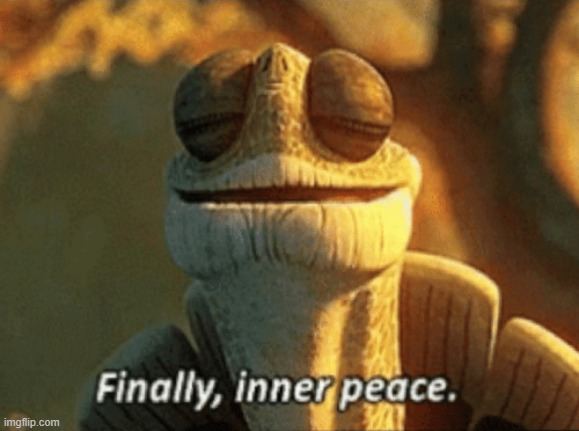


## Predicting Carbon emissions 🌍

Ok we can do this we are half done !!!!
This time it seems like the best model is defently xgboost without the enrgy starscore so likes get to finetuning. Looking at the documentations we choose to predict GHGE emissions intensity because it is propotional to the total surface of a building, making it more interesting because it factors out the effect that large surface have larger emissions wich is logical and helps our model learn from other factors


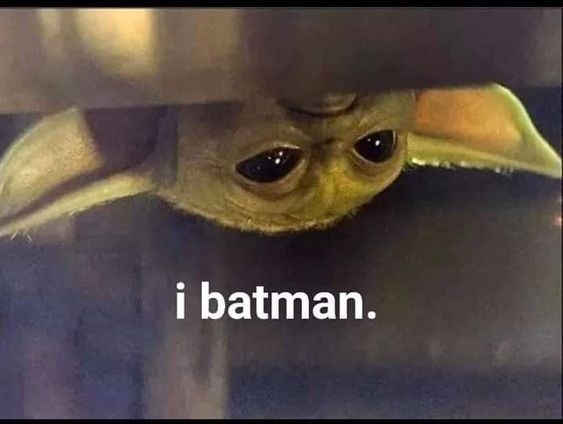

In [74]:
df = pd.read_csv('/content/gdrive/My Drive/openclassrooms/df_regression.csv')

In [75]:

df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.drop(['ENERGYSTARScore'], axis = 1, inplace = True )
df_regression = df.copy()
df_regression = pd.DataFrame(Scaler.transform(df_regression), columns = df_regression.columns)

In [76]:
X = df_regression.drop(['TotalGHGEmissions'], axis = 1, inplace = False)
X = X.drop(['ZipCode', 'CouncilDistrictCode', 'SiteEnergyUse(kBtu)', 'DataYear', 'GHGEmissionsIntensity' ], axis = 1)
Y = df_regression['GHGEmissionsIntensity']

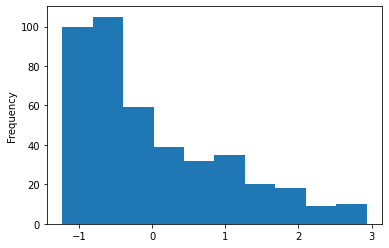

In [77]:
Y.plot(kind = 'hist')

In [87]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y,test_size= 0.3)
display(X_test) 

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),...,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType_Other - Restaurant/Bar,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Supermarket/Grocery Store
157,0.764044,-1.199113,-1.553424,0.113645,0.395014,-0.695722,-0.659298,-0.820740,-0.029051,-0.125685,...,-0.190808,3.295620,-0.154857,-0.04845,-0.04845,-1.796586,-0.119381,-0.215798,-0.04845,-0.068599
384,-0.254367,0.458285,-1.202583,0.113645,-0.290640,-0.835095,-0.812778,-1.296055,-0.003474,0.004319,...,-0.190808,3.295620,-0.154857,-0.04845,-0.04845,-1.796586,-0.119381,-0.215798,-0.04845,-0.068599
335,-0.286618,0.804743,-0.787953,0.113645,-0.976294,-0.865871,-0.846669,-1.031628,-1.108396,-0.992376,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,-1.796586,-0.119381,-0.215798,-0.04845,-0.068599
389,-0.177245,1.677401,-0.947426,0.113645,-0.290640,-0.940029,-0.928333,-0.813870,1.444177,1.569178,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,0.556611,-0.119381,-0.215798,-0.04845,-0.068599
154,0.018464,-0.750411,-1.138794,0.113645,-0.290640,-0.769927,-0.741014,-0.723856,1.786908,1.886964,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,0.556611,-0.119381,-0.215798,-0.04845,-0.068599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,-0.523794,2.093541,0.487830,0.113645,-0.290640,-0.139657,-0.046951,-0.096591,1.029832,1.034718,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,0.556611,-0.119381,-0.215798,-0.04845,-0.068599
409,0.070346,0.731805,-0.947426,0.113645,-0.290640,-0.673936,-0.635307,-1.273319,-0.100666,-0.236429,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,-1.796586,-0.119381,4.633971,-0.04845,-0.068599
190,0.170304,-0.461913,1.412774,0.113645,1.080668,-0.193504,-0.106247,0.041783,0.656410,0.562853,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,0.556611,-0.119381,-0.215798,-0.04845,-0.068599
390,-1.290807,0.268775,0.168885,0.113645,-0.976294,0.112736,0.230989,0.217232,-0.341089,-0.231614,...,-0.190808,-0.303433,-0.154857,-0.04845,-0.04845,0.556611,-0.119381,-0.215798,-0.04845,-0.068599


In [82]:
from xgboost.sklearn import XGBRegressor
import xgboost as xg
xboost = XGBRegressor()

###Xgboost

In [83]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.01, .03, 0.05, .07, 0.1, 0.3], #so called `eta` value
              'max_depth': [3 ,5, 6, 7, 10, 12],
              'n_estimators': [100, 200, 500, 800],
              'subsample': [0.5, 1]
              }

xgb_grid = model_selection.GridSearchCV(xboost,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=100,
                        scoring = 'neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[15:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1, 0.3],
                         'max_depth': [3, 5, 6, 7, 10, 12],
                         'n_estimators': [100, 200, 500, 800], 'nthread': [4],
                         'objective': ['reg:linear'], 'subsample': [0.5, 1]},
             scoring='neg_mean_squared_error', verbose=100)

In [92]:
rmse_test = np.sqrt(-xgb_grid.best_score_)
print(rmse_test)

0.209118864443877


In [90]:
import pickle

In [91]:
pickle.dump(xgb_grid, open('/content/gdrive/My Drive/projet_prediction/finetuned_GHGE_model.pkl','wb'))

In [88]:
from sklearn.metrics import mean_squared_error

Y_pred = xgb_grid.predict(X_test)
random = np.full(129, np.mean(Y), dtype=np.float64)
RMSE = np.sqrt(mean_squared_error(y_test, Y_pred))
RMSE_rand = np.sqrt(mean_squared_error(y_test, random))
print(RMSE_rand)
print(RMSE)
print( "Notre model est", RMSE_rand/RMSE, "fois meilleur qu'un modele qui predit la moyenne de nos données")

0.9909475289611347
0.162096637863811
Notre model est 6.113313280400675 fois meilleur qu'un modele qui predit la moyenne de nos données
